# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Loading the csv file
df = pd.read_csv('weatherAUS.csv')

# Exploratory data analysis

In [2]:
# Let's check the shape of the dataframe
df.shape

(145460, 23)

In [3]:
# Let's see first 5 rows of the dataframe
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Let's check the data type of all the features in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Let's reduce the memory usage by using appropriate data types
float_cols = df.select_dtypes(include=np.float64)
df[float_cols.columns] = df[float_cols.columns].astype(np.float32)

In [6]:
# Let's get some decriptive statistical information about the data 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.000000,130432.000000,89572.000000,86102.000000,143693.000000,141851.000000
mean,12.194036,23.221348,2.360918,5.468232,7.611178,40.035229,14.043426,18.662657,68.880829,51.539116,1017.649902,1015.255859,4.447461,4.509930,16.990633,21.683392
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915376,8.809800,19.029165,20.795902,7.106530,7.037414,2.887159,2.720357,6.488753,6.936650
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.099976,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900024,1010.400024,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.599976,1015.200012,5.000000,5.000000,16.700001,21.100000
75%,16.900000,28.200001,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400024,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900002,48.099998,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.599976,9.000000,9.000000,40.200001,46.700001


In [7]:
# Let's check are there any null values
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [8]:
# Let's check any duplicated values
df.duplicated().sum()

0

<AxesSubplot:ylabel='RainTomorrow'>

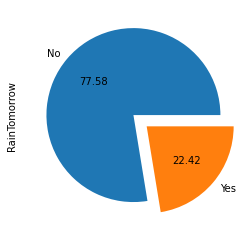

In [9]:
ex = [0,0.2]
df['RainTomorrow'].value_counts().plot(kind='pie',autopct='%.2f',explode=ex)

In [10]:
print(len(df['Location'].unique()))
df['Location'].unique()

49


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [11]:
# fig,ax = plt.subplots(figsize = (15,7))
# sns.barplot(x = df['Location'],y = df['Rainfall'],data = df)
# plt.xticks(rotation = 'vertical')

# Data processing

In [12]:
# Let's first get all the features having percentage of missing values < 5%
cols_1 = [col for col in df.columns if df[col].isnull().mean()*100<5.0 and df[col].isnull().mean()*100>0.0]
temp1 = df[cols_1].copy()
temp1.head(5)

,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,WNW,20.0,24.0,71.0,22.0,16.900000,21.799999,No,No
1,7.4,25.100000,0.0,WSW,4.0,22.0,44.0,25.0,17.200001,24.299999,No,No
2,12.9,25.700001,0.0,WSW,19.0,26.0,38.0,30.0,21.000000,23.200001,No,No
3,9.2,28.000000,0.0,E,11.0,9.0,45.0,16.0,18.100000,26.500000,No,No
4,17.5,32.299999,1.0,NW,7.0,20.0,82.0,33.0,17.799999,29.700001,No,No


In [13]:
# Let's implement CCA technique to handle missing values
temp1.dropna(inplace=True)

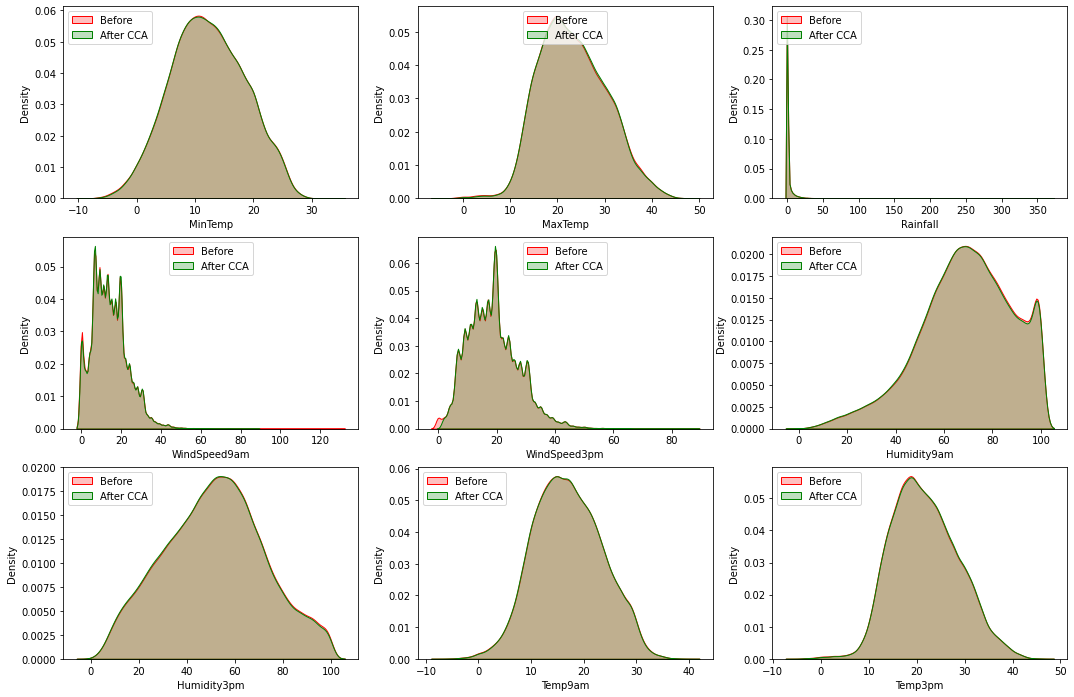

In [14]:
# Let's visualize the change in the distribution before and after removing the missing values
fig,ax = plt.subplots(3,3,figsize=(18,12))

sns.kdeplot(df['MinTemp'],shade=True,ax = ax[0][0],color = 'red',label = 'Before')
sns.kdeplot(temp1['MinTemp'],shade=True,ax = ax[0][0],color = 'green',label = 'After CCA')
ax[0][0].legend(loc='upper left')

sns.kdeplot(df['MaxTemp'],shade=True,ax = ax[0][1],color = 'red',label = 'Before')
sns.kdeplot(temp1['MaxTemp'],shade=True,ax = ax[0][1],color = 'green',label = 'After CCA')
ax[0][1].legend(loc='upper center')

sns.kdeplot(df['Rainfall'],shade=True,ax = ax[0][2],color = 'red',label = 'Before')
sns.kdeplot(temp1['Rainfall'],shade=True,ax = ax[0][2],color = 'green',label = 'After CCA')
ax[0][2].legend(loc='upper left')

sns.kdeplot(df['WindSpeed9am'],shade=True,ax = ax[1][0],color = 'red',label = 'Before')
sns.kdeplot(temp1['WindSpeed9am'],shade=True,ax = ax[1][0],color = 'green',label = 'After CCA')
ax[1][0].legend(loc='upper center')

sns.kdeplot(df['WindSpeed3pm'],shade=True,ax = ax[1][1],color = 'red',label = 'Before')
sns.kdeplot(temp1['WindSpeed3pm'],shade=True,ax = ax[1][1],color = 'green',label = 'After CCA')
ax[1][1].legend(loc='upper center')

sns.kdeplot(df['Humidity9am'],shade=True,ax = ax[1][2],color = 'red',label = 'Before')
sns.kdeplot(temp1['Humidity9am'],shade=True,ax = ax[1][2],color = 'green',label = 'After CCA')
ax[1][2].legend(loc='upper left')

sns.kdeplot(df['Humidity3pm'],shade=True,ax = ax[2][0],color = 'red',label = 'Before')
sns.kdeplot(temp1['Humidity3pm'],shade=True,ax = ax[2][0],color = 'green',label = 'After CCA')
ax[2][0].legend(loc='upper left')

sns.kdeplot(df['Temp9am'],shade=True,ax = ax[2][1],color = 'red',label = 'Before')
sns.kdeplot(temp1['Temp9am'],shade=True,ax = ax[2][1],color = 'green',label = 'After CCA')
ax[2][1].legend(loc='upper left')

sns.kdeplot(df['Temp3pm'],shade=True,ax = ax[2][2],color = 'red',label = 'Before')
sns.kdeplot(temp1['Temp3pm'],shade=True,ax = ax[2][2],color = 'green',label = 'After CCA')
ax[2][2].legend(loc='upper left')

plt.show()

In [15]:
# Let's compare the proportion categories in WindDir3pm feature before and after applying Complete case analysis
compare_wd = pd.concat([df['WindDir3pm'].value_counts()/len(df),temp1['WindDir3pm'].value_counts()/len(temp1)],axis=1)
compare_wd.columns = ['Original','After_CCA']
compare_wd                

,Original,After_CCA
SE,0.074508,0.076670
W,0.069504,0.071380
S,0.068239,0.069559
WSW,0.065434,0.067524
SSE,0.064616,0.066290
SW,0.064306,0.066639
N,0.061116,0.062880
WNW,0.061006,0.062382
NW,0.059192,0.061045
ESE,0.058470,0.059915


Since the distribution of features as well the ratio is not chaning a lot after implementing Complete case analysis, thus it is a green singal to simply drop the missing values

In [16]:
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow']

df.dropna(subset = cols , inplace=True)

In [17]:
# Now let's do same for WindGustDir and WindGustSpeed feature
temp2 = df[['WindGustDir','WindGustSpeed']].copy()

In [18]:
# Let's compare the proportion categories in RainToday feature before and after applying Complete case analysis
compare_WindGustDir = pd.concat([df['WindGustDir'].value_counts()/len(df),temp2['WindGustDir'].value_counts()/len(temp2)],axis=1)
compare_WindGustDir.columns = ['Original','After_CCA']
compare_WindGustDir                

,Original,After_CCA
W,0.070577,0.070577
SE,0.067182,0.067182
N,0.064864,0.064864
SSE,0.064789,0.064789
S,0.064596,0.064596
E,0.064418,0.064418
WSW,0.064084,0.064084
SW,0.063571,0.063571
SSW,0.062278,0.062278
WNW,0.057775,0.057775


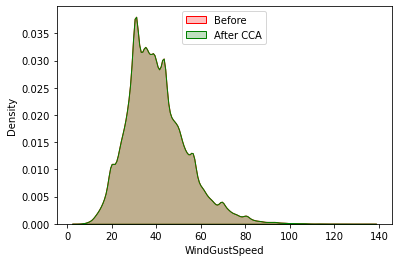

In [19]:
#Let's visualize the change in the distribution before and after removing the missing values
fig,ax = plt.subplots(figsize=(6,4))

sns.kdeplot(df['WindGustSpeed'],shade=True,color = 'red',label = 'Before')
sns.kdeplot(temp2['WindGustSpeed'],shade=True,color = 'green',label = 'After CCA')
ax.legend(loc='upper center')

plt.show()

Since the distribution and the proportaion of categories is not changing a lot thus it is a green signla that we can remove the missing values

In [20]:
df.dropna(subset = ['WindGustDir','WindGustSpeed'],inplace=True)

In [21]:
# Now let's first compile all the features in which the percentage of missing value is more than 5%
cols_2 = [col for col in df.columns if df[col].isnull().mean()*100>5]
temp3 = df[cols_2].copy()
temp3.head(4)

,Evaporation,Sunshine,WindDir9am,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,NaN,NaN,W,1007.700012,1007.099976,8.0,NaN
1,NaN,NaN,NNW,1010.599976,1007.799988,NaN,NaN
2,NaN,NaN,W,1007.599976,1008.700012,NaN,2.0
3,NaN,NaN,SE,1017.599976,1012.799988,NaN,NaN


For imputing the missing values we will use MICE algorithm, but before implementing this algorithm we need to encode the categorical feature

In [22]:
# Let's encode the Winddir9am feature
map_wind_direction = {'W':0, 'NNW':1, 'SE':2, 'ENE':3, 'SW':4, 'SSE':5, 'S':6, 'NE':7, 'SSW':8, 'N':9, 'WSW':10,'ESE':11,'E':12,'NW':13,
                      'WNW':14, 'NNE':15}

temp3['WindDir9am'] = temp3['WindDir9am'].map(map_wind_direction)

In [23]:
# Now we will be using MICE for imputing the missing values in company_size variable
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman')

In [24]:
# Let's now impute the missing value
temp3 = imp.fit_transform(temp3)

[IterativeImputer] Completing matrix with shape (128576, 7)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.29
[IterativeImputer] Change: 24.34802982976969, scaled tolerance: 1.041e-07 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.57
[IterativeImputer] Change: 6.702993485301235, scaled tolerance: 1.041e-07 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.88
[IterativeImputer] Change: 5.181003207896087, scaled tolerance: 1.041e-07 
[IterativeImputer] Ending imputation round 4/30, elapsed time 1.16
[IterativeImputer] Change: 3.790569472403309, scaled tolerance: 1.041e-07 
[IterativeImputer] Ending imputation round 5/30, elapsed time 1.45
[IterativeImputer] Change: 2.6524244734741096, scaled tolerance: 1.041e-07 
[IterativeImputer] Ending imputation round 6/30, elapsed time 1.73
[IterativeImputer] Change: 1.8314511625011711, scaled tolerance: 1.041e-07 
[IterativeImputer] Ending imputation round 7/30, elapsed time 2.04
[IterativeImputer] 

C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
temp3 = pd.DataFrame(temp3)
temp3.columns = ['Evaporation', 'Sunshine', 'WindDir9am', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm']
temp3 = round(temp3)

In [26]:
# Now let's convert the WindDir9am feature back to categories
map_wind_direction = {0.0:'W',1.0:'NNW',2.0:'SE', 3.0:'ENE',4.0:'SW',5.0:'SSE', 6.0:'S', 7.0:'NE', 8.0:'SSW',9.0:'N',10.0:'WSW',11.0:'ESE',
                      12.0:'E',13.0:'NW',14.0:'WNW', 15.0:'NNE'}

temp3['WindDir9am'] = temp3['WindDir9am'].map(map_wind_direction)

After imputing the missing value using MICE let's now check the change in distribution and ratio

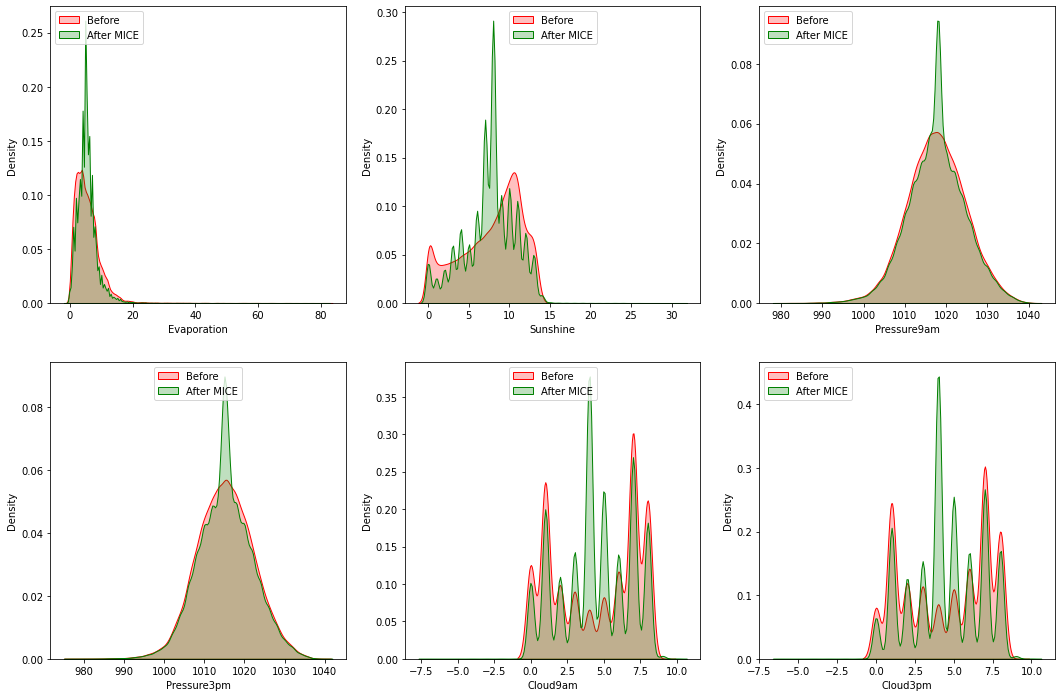

In [27]:
# Let's visualize the change in the distribution before and after removing the missing values
fig,ax = plt.subplots(2,3,figsize=(18,12))

sns.kdeplot(df['Evaporation'],shade=True,ax = ax[0][0],color = 'red',label = 'Before')
sns.kdeplot(temp3['Evaporation'],shade=True,ax = ax[0][0],color = 'green',label = 'After MICE')
ax[0][0].legend(loc='upper left')

sns.kdeplot(df['Sunshine'],shade=True,ax = ax[0][1],color = 'red',label = 'Before')
sns.kdeplot(temp3['Sunshine'],shade=True,ax = ax[0][1],color = 'green',label = 'After MICE')
ax[0][1].legend(loc='upper center')

sns.kdeplot(df['Pressure9am'],shade=True,ax = ax[0][2],color = 'red',label = 'Before')
sns.kdeplot(temp3['Pressure9am'],shade=True,ax = ax[0][2],color = 'green',label = 'After MICE')
ax[0][2].legend(loc='upper left')

sns.kdeplot(df['Pressure3pm'],shade=True,ax = ax[1][0],color = 'red',label = 'Before')
sns.kdeplot(temp3['Pressure3pm'],shade=True,ax = ax[1][0],color = 'green',label = 'After MICE')
ax[1][0].legend(loc='upper center')

sns.kdeplot(df['Cloud9am'],shade=True,ax = ax[1][1],color = 'red',label = 'Before')
sns.kdeplot(temp3['Cloud9am'],shade=True,ax = ax[1][1],color = 'green',label = 'After MICE')
ax[1][1].legend(loc='upper center')

sns.kdeplot(df['Cloud3pm'],shade=True,ax = ax[1][2],color = 'red',label = 'Before')
sns.kdeplot(temp3['Cloud3pm'],shade=True,ax = ax[1][2],color = 'green',label = 'After MICE')
ax[1][2].legend(loc='upper left')

In [28]:
comopare_wind_dir = pd.concat([df['WindDir9am'].value_counts()/len(df),temp3['WindDir9am'].value_counts()/len(temp3)],axis=1)
comopare_wind_dir.columns = ['Before','After MICE']
comopare_wind_dir

,Before,After MICE
N,0.082426,0.083064
SSE,0.066754,0.066754
E,0.065689,0.065689
SE,0.064343,0.064343
S,0.062173,0.062687
SW,0.058681,0.058681
NNE,0.058253,0.058253
W,0.056799,0.056799
ENE,0.056589,0.056589
NW,0.056364,0.056364


In [30]:
df.reset_index(inplace=True,drop=True)
temp3.reset_index(inplace=True,drop=True)
temp3.columns = ['evapuration', 'sunshine', 'windDir9am', 'pressure9am', 'pressure3pm','cloud9am', 'cloud3pm']

In [34]:
df = pd.concat([df,temp3],axis=1)
df.drop(['Evaporation', 'Sunshine', 'WindDir9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'],axis=1,inplace=True)